## 라이브러리

In [1]:
# 데이터 분석 기본 라이브러리 관련
import os
import sys
import warnings
from tqdm import tqdm_notebook

import numpy as np
import pandas as pd

# EDA 관련
import matplotlib
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# 데이터 전처리 관련
from datetime import datetime
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [3]:
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', 100)
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

## 전체적으로 사용되는 함수

In [4]:
def MSG(x):
    if x['SMS\n수신여부']=='수신':
        return 'Y'
    else:
        return 'N'
    
def DateToStr1(x):
    return str(x['최종접수일'])

def DateToStr2(x):
    return str(x['가입일'])

def DateToStr3(x):
    return str(x['최종방문일▼'])

def DateToStr4(x):
    return str(x['최종방문일'])

def StringToStr(x):
    return str(x['고객번호'])

def NAME(x):
    if x['최종방문일_x']>=x['최종방문일_y']:
        return x['고객명_x']
    else:
        return x['고객명_y']
    
def Recent(x):
    if str(x['최종방문일_x'])>str(x['최종방문일_y']):
        return x['최종방문일_x']
    else:
        return x['최종방문일_y']
    
def StrToDate(x):
    return datetime.strptime(x['최종방문일'],'%Y-%m-%d').date()

def RECEN(x):
    return x['recency']-x['최종방문일']

def DateToStr(x):
    return str(x['recency'])

def StrToNum(x):
    return int(x['recency'])

## 데이터 불러오기

In [5]:
pos=pd.read_excel('./고객data/갈비명가이상돈암본관_고객현황조회_20210316.xlsx')

In [6]:
res=pd.read_excel('./고객data/(갈비명가이상 돈암본관)데이터_20210415.xlsx')

In [7]:
excel=pd.read_excel('./고객data/2018 04 돈암점.xlsx')

In [8]:
msg=pd.read_excel('./고객data/뿌리오지점별고객리스트.xlsx','돈암본관',skiprows=2)

In [9]:
pur=pd.read_excel('./고객data/고객구매정보_2004_2103.xlsx')

## 1) 포스데이터

In [10]:
print(pos.shape)

(11910, 21)


In [ ]:
pos.head()

#### 1. 각 열에 결측값 확인

In [11]:
pos.drop('NO',axis=1,inplace=True)
pos.isnull().sum()

고객번호             0
고객명              0
매장명              0
등급               0
성별               0
생년월일         11406
전화번호           220
핸드폰번호            0
구매금액             0
구매횟수             0
포인트              0
가입일              0
최종방문일            0
우편번호         11626
주소           11688
상세주소         11728
메일주소         11846
SMS\n수신여부        0
기념일          11909
비고           11910
dtype: int64

-> 생년월일, 전화번호, 우편번호, 주소, 상세주소, 메일주소, 기념일, 비고에 대해서 결측치 존재( 대부분의 데이터가 결측임)

#### 2. 정보가 있는 데이터만 가져와서 새로운 데이터 셋 생성

In [12]:
pos.drop(['생년월일','전화번호','우편번호','주소','상세주소','메일주소','기념일','비고'],axis=1,inplace=True)

In [ ]:
pos.head()

#### 3. easyPOS안의 돈암점 고객수 

In [13]:
pos['고객번호'].nunique()

11910

#### 4.easyPOS안의 모든 고객은 '일반'고객

In [14]:
pos['등급'].unique()

array(['일반'], dtype=object)

#### 5. 달 별 가입한 고객의 수 & 그래프

In [15]:
a=pd.DataFrame(pos['가입일'].value_counts())
a=a.resample('1M').sum()
a

,가입일
2011-05-31,34
2011-06-30,18
2011-07-31,13
2011-08-31,32
2011-09-30,14
...,...
2020-08-31,135
2020-09-30,102
2020-10-31,112
2020-11-30,99


Text(0.5, 1.0, '월별 돈암점 신규 가입자 수')

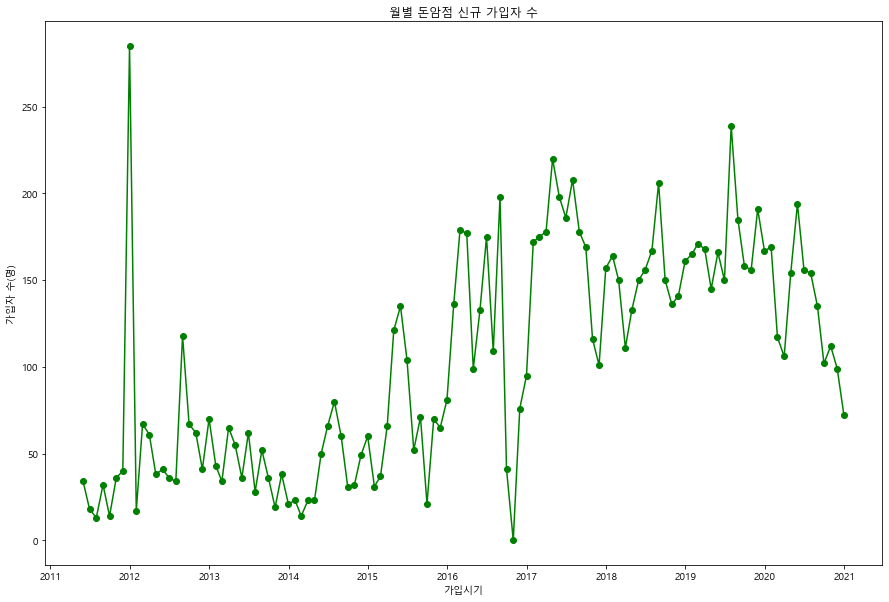

In [16]:
plt.figure(figsize=(15,10))
plt.plot(a.index,a['가입일'], marker="o", color = "green")
plt.xlabel('가입시기')
plt.ylabel('가입자 수(명)')
plt.title('월별 돈암점 신규 가입자 수')

#### 6. 달 별 최종방문한 고객수 & 그래프

In [17]:
a=pd.DataFrame(pos['최종방문일'].value_counts())
a=a.resample('1M').sum()
a

,최종방문일
2017-01-31,116
2017-02-28,129
2017-03-31,122
2017-04-30,140
2017-05-31,148
2017-06-30,140
2017-07-31,153
2017-08-31,139
2017-09-30,125
2017-10-31,113


Text(0.5, 1.0, '월별 돈암점 최종 방문자 수')

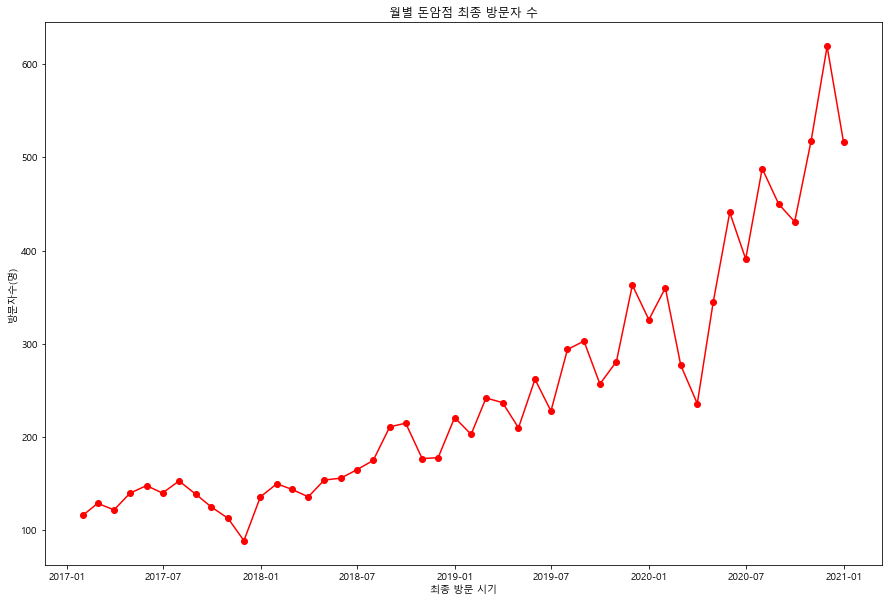

In [18]:
plt.figure(figsize=(15,10))
plt.plot(a.index,a['최종방문일'], marker="o", color = "red")
plt.xlabel('최종 방문 시기')
plt.ylabel('방문자수(명)')
plt.title('월별 돈암점 최종 방문자 수')

#### 다른 데이터 셋과 merge하기 위한 작업

In [19]:
pos['문자수신여부']=pos.apply(MSG,axis=1)
pos.drop('SMS\n수신여부',axis=1,inplace=True)

In [20]:
pos['연락처']=pos['핸드폰번호'].str.replace("-","")
pos.drop('핸드폰번호',axis=1,inplace=True)

In [21]:
pos['고객번호']=pos.apply(StringToStr,axis=1)
pos['고객번호']=pos['고객번호'].str.pad(width=8,side='left',fillchar='0')

In [22]:
pos['최종방문일']=pos.apply(DateToStr4,axis=1)
pos.rename(columns={'최종방문일':'최종방문일'},inplace=True)

#### 7. pos에 대한 최종 데이터 셋
- 정보가 없는 변수 제거 : 생년월일, 우편번호, 주소, 상세주소, 메일주소, 기념일, 비고
- 변형이유 : 다른 데이터 셋과 형태를 동일하게 만들기 위함
- 변형한 변수 :SMS\n수신여부

In [ ]:
pos.head()

## 예약고객

In [ ]:
res.head()

#### 1. 총 2932명의 돈암점 예약고객

In [23]:
res.shape

(2932, 18)

#### 2. 총 예약횟수 = 예약완료 + 취소 + 노쇼
- 모든 데이터가 이를 만족 (오류x)

In [24]:
res[res['총 예약횟수']==(res['예약완료']+res['취소']+res['노쇼'])].shape

(2932, 18)

#### 3. 별칭은 통일되는 정보 없음
- 예약시 특이사항 같은 정보
- 변수에서 제외

In [25]:
res['별칭'].unique()

array(['-', '00', '갈비탕', '이상정식', '0', '돈안골프'], dtype=object)

In [ ]:
res[res['별칭']!='-']

#### 4. 예약시 특징에 대한 정보
- 예약시마다 달라지는 개인적인 내용이기 때문에 변수에서 제외

In [26]:
res['고객메모'].unique()

array(['-', '미역국준비', '애기의자준비', '미취학(4세)1명', '가족관계증명서', '미역국', '인원은다시연락하심',
       '차량운행왕복', '28번.지정', '같비탕', '구이', '생신상', '차량왕복운행',
       '초등생1명 / 미취학  5세 1명', '어머니칠순', '갈비탕', '산사모임', '애기의자1개 준비', '마역국준비',
       '생신미역국준비', '칠순현수막설치', '가족관계증명서 안내드림', '아기의자', '아기의자 1개 준비',
       '성북문화재단', '가족관계 증명서 신부증', '이상갈비 4인분 준비', '미취학(돌 되기전 유아) 의자1개',
       '미취학 (6세)  의자1 / 가족관계증명서', '미취학 6세(의자 2) / 가족관계증명서',
       '가족관계증명서(초등생 2명)', '미취학 6세1명 / 4세1명'], dtype=object)

#### 5. 고객그룹은 -, test로 이루어져 있음
- 고객그룹이 test인 고객정보

In [27]:
res['고객그룹'].unique()

array(['-', 'test'], dtype=object)

In [ ]:
res[res['고객그룹']=='test']

#### 6. 메뉴 이용 금액에 대한 정보가 완전치 못함
- 변수에서 제외

In [28]:
res['메뉴이용금액'].unique()

array([    0, 60000], dtype=int64)

In [ ]:
res[res['메뉴이용금액']!=0]

#### 7. 노쇼레벨별 차이점에 대해 명확하게 하기 어려움
- 변수에서 제외

In [29]:
res['노쇼레벨'].unique()

array([0, 1, 2], dtype=int64)

In [ ]:
res[res['노쇼레벨']==0]

In [ ]:
res[res['노쇼레벨']==1]

In [ ]:
res[res['노쇼레벨']==2]

#### 8. 정보가 불충분한 고객번호, 별칭, 고객메모, 고객그룹, 메뉴이용금액, 수신거부일, 노쇼레벨을 변수에서 제거

In [31]:
res.drop(['고객번호','별칭','고객메모','고객그룹','메뉴이용금액','수신거부일','노쇼레벨'],axis=1,inplace=True)

In [ ]:
res.head()

#### 다른 데이터셋과 merge하기 위한 작업

In [32]:
res.replace('-',np.nan,inplace=True)

In [33]:
res['0']=0
cols=['0','휴대전화번호']
res['휴대전화번호']=res[cols].apply(lambda row:"".join(row.values.astype(str)),axis=1)
res.drop('0',axis=1,inplace=True)

In [34]:
res['최종접수일']=res.apply(DateToStr1,axis=1)
res['가입일']=res.apply(DateToStr2,axis=1)
res['최종방문일']=res.apply(DateToStr4,axis=1)
res['최종접수일']=res['최종접수일'].str[:10]
res['가입일']=res['가입일'].str[:10]
res.rename(columns={'휴대전화번호':'연락처'},inplace=True)

In [ ]:
res.head()

#### 9. 최종 예약 고객 데이터
- 정보가 없는 변수 제거 : 고객번호, 별칭, 고객메모, 고객그룹, 메뉴이용금액, 수신거부일, 노쇼레벨
- 변형이유 : 다른 데이터 셋과 형태를 동일하게 만들기 위해
- 변형한 변수 : 연락처

In [ ]:
res.head()

## 3) 엑셀고객

In [ ]:
excel

#### 다른 데이터셋과 merge하기 위한 작업

In [35]:
excel['0']=0
cols=['0','연락처']
excel['연락처']=excel[cols].apply(lambda row:"".join(row.values.astype(str)),axis=1)
excel.drop('0',axis=1,inplace=True)

In [ ]:
excel.head()

In [36]:
excel.연락처.apply(lambda x: len(x)).value_counts()

11    67
10     1
Name: 연락처, dtype: int64

#### 이상하게 입력된 전화번호 삭제

In [37]:
excel=excel[excel.연락처.apply(lambda x: len(x))==11]

#### 엑셀 돈암점 데이터 고객 67명

In [ ]:
excel

In [38]:
excel['연락처'].nunique()

67

## 뿌리오 문자

In [ ]:
msg.head()

#### 뿌리오 돈암점 고객수 13942명

In [39]:
msg.shape

(13942, 3)

#### 다른 데이터 셋과 합치기 위해
- 성함 -> 고객명
- 전화번호 -> 연락처

In [40]:
msg.drop('No.',axis=1,inplace=True)
msg.rename(columns={'성함':'고객명','전화번호':'연락처'},inplace=True)
msg['연락처']=msg['연락처'].str.replace('-','')

In [ ]:
msg.head()

In [41]:
msg.연락처.apply(lambda x: len(x)).value_counts()

11    13843
10       99
Name: 연락처, dtype: int64

In [ ]:
msg[msg.연락처.apply(lambda x: len(x))==10]

- 10자리 연락처 -> 과거에 사용되었던 연락처
- 11자리 연락처만 최종 데이터 셋으로 선정

In [42]:
msg=msg[msg.연락처.apply(lambda x: len(x))==11]

## 연락처 처리
### 1) 엑셀데이터(excel) + 뿌리오데이터(msg)

In [43]:
phone=pd.merge(excel,msg,how='outer',on='연락처')

In [ ]:
phone

In [44]:
notsame=phone[(phone['고객명_x'].isnull()==0)&(phone['고객명_y'].isnull()==0)&(phone['고객명_x']!=phone['고객명_y'])]
print(notsame.shape)

(3, 3)


In [ ]:
notsame.head()

In [45]:
cols=['고객명_x','고객명_y']
notsame['고객명']=notsame[cols].apply(lambda row:' / '.join(row.values.astype(str)),axis=1)
notsame.drop(['고객명_x','고객명_y'],axis=1,inplace=True)

In [46]:
same=phone[(phone['고객명_x'].isnull()==0)&(phone['고객명_y'].isnull()==0)&(phone['고객명_x']==phone['고객명_y'])]
same.drop('고객명_x',axis=1,inplace=True)
same.rename(columns={'고객명_y':'고객명'},inplace=True)

In [ ]:
same.head()

In [47]:
one=phone[(phone['고객명_x'].isnull()!=0)|(phone['고객명_y'].isnull()!=0)]
print(one.shape)

(13892, 3)


In [ ]:
one.head()

In [48]:
one_x=one[one['고객명_y'].isnull()]
one_x.drop('고객명_y',axis=1,inplace=True)
one_x.rename(columns={'고객명_x':'고객명'},inplace=True)

one_y=one[one['고객명_x'].isnull()]
one_y.drop('고객명_x',axis=1,inplace=True)
one_y.rename(columns={'고객명_y':'고객명'},inplace=True)

In [49]:
phone=pd.concat([notsame,same,one_x,one_y])
print(phone.shape)

(13901, 2)


In [ ]:
phone.head()

### easyPOS데이터(pos)
- 총 11910개의 연락처 중 11716개만 11자리 연락처
- 11자리 연락처만 최종 데이터셋으로 선정

In [50]:
pos_phone=pos[['고객명','연락처','최종방문일']]
print(pos_phone.shape)

(11910, 3)


In [ ]:
pos_phone.head()

In [51]:
pos_phone.연락처.apply(lambda x: len(x)).value_counts()

11    11716
10      113
3        73
7         3
9         2
8         1
5         1
6         1
Name: 연락처, dtype: int64

In [71]:
pos_phone=pos_phone[pos_phone.연락처.apply(lambda x: len(x))==11]

### 3) 예약데이터(res)
- 총 2932개의 데이터 중 2895개만 11자리 연락처
- 11자리 연락처만 최종 데이터셋으로 선정

In [52]:
res_phone=res[['고객명','연락처','최종방문일']]
print(res_phone.shape)

(2932, 3)


In [ ]:
res_phone.head()

In [53]:
res_phone.연락처.apply(lambda x: len(x)).value_counts()

11    2895
10      24
9        8
2        1
8        1
12       1
14       1
13       1
Name: 연락처, dtype: int64

In [74]:
pos_phone=pos_phone[pos_phone.연락처.apply(lambda x: len(x))==11]

#### 최종 데이터와 합치기 위한 작업

In [54]:
rp_phone=pd.merge(res_phone,pos_phone,how='outer',on='연락처')

In [ ]:
rp_phone

In [55]:
rp_phone['연락처'].nunique()

14178

In [56]:
rp_phone['최종방문일_x'].fillna('2020-0-0',inplace=True)
rp_phone['최종방문일_y'].fillna('2020-0-0',inplace=True)

In [57]:
same=rp_phone[(rp_phone['고객명_x']==rp_phone['고객명_y'])]
same.drop(['고객명_x','최종방문일_x','최종방문일_y'],axis=1,inplace=True)
same.rename(columns={'고객명_y':'고객명'},inplace=True)

In [ ]:
same

In [58]:
notsame=rp_phone[rp_phone['고객명_x']!=rp_phone['고객명_y']]

In [ ]:
notsame

In [59]:
notsame['고객명']=notsame.apply(NAME,axis=1)

In [60]:
notsame.drop(['고객명_x','최종방문일_x','고객명_y','최종방문일_y'],axis=1,inplace=True)

In [ ]:
notsame

#### 엑셀데이터 + 뿌리오데이터 + 포스데이터 + 예약데이터

In [61]:
phnoe=pd.concat([same,notsame,phone])

In [ ]:
phone

In [62]:
name_null=phone[phone['고객명'].isnull()]
name_null.drop_duplicates(['연락처'],inplace=True)

,연락처,고객명


In [63]:
name_not_null=phone[phone['고객명'].isnull()==0]

In [ ]:
name_not_null

In [64]:
name_not_null['연락처'].nunique()

13901

In [65]:
name_not_null.drop_duplicates(['연락처'],inplace=True)

In [66]:
phone=pd.concat([name_null,name_not_null],axis=0)
phone=phone.sort_values(by=['연락처','고객명'],ascending=[False,False])

In [67]:
phone.drop_duplicates(['연락처'],inplace=True)

In [ ]:
phone

In [68]:
phone['연락처'].nunique()

13901

In [90]:
phone.to_excel('./돈암점방문명단.xlsx',index=False,encoding='cp949')

## 포스데이터 + 고객구매정보데이터

In [ ]:
pur.head()

In [69]:
pur.drop('Unnamed: 0',axis=1,inplace=True)
pur.shape

(25829, 14)

In [70]:
pur['고객번호']=pur.apply(StringToStr,axis=1)
pur['고객번호']=pur['고객번호'].str.pad(width=8,side='left',fillchar='0')

In [ ]:
pur.head()

In [71]:
pos_pur=pd.merge(pos,pur,left_on='고객번호',right_on='고객번호',how='left')
print(pos_pur.shape)

(11910, 25)


In [ ]:
pos_pur.head()

In [72]:
PP=pos_pur[pos_pur['최종방문일_x']>='2020-04-01']
print(PP.shape)

(4199, 25)


In [ ]:
PP.head()

In [73]:
PP.isnull().sum()

고객번호         0
고객명_x        0
매장명          0
등급           0
성별           0
구매금액         0
구매횟수         0
포인트          0
가입일          0
최종방문일_x      0
문자수신여부       0
연락처          0
고객명_y      188
누적방문회수     188
최종방문일_y    188
기간방문회수     188
기간방문일수     188
매출수량       188
총매출액       188
순매출액       188
할인금액       188
현금금액       188
카드금액       188
기타금액       188
카드번호       188
dtype: int64

In [ ]:
PP[(PP['고객명_x']!=PP['고객명_y'])&(PP['고객명_y'].isnull()==0)]

방문일자가 더 최근일 기준으로 고객명 변경

In [74]:
PP.loc[(PP['고객명_x']=='송민지'),'고객명_y']='송민주'

In [75]:
PP.drop('고객명_y',axis=1,inplace=True)
PP.rename(columns={'고객명_x':'고객명'},inplace=True)

In [ ]:
PP.head()

In [76]:
PP['최종방문일']=PP.apply(Recent,axis=1)
PP.drop(['최종방문일_x','최종방문일_y'],axis=1,inplace=True)
PP['최종방문일']=PP['최종방문일'].str[:10]

In [ ]:
PP.head()

In [142]:
PP.to_excel('./돈암점1년방문고객.xlsx',index=False, encoding='cp949')

## 고객 등급 나누기 ( 고객 데이터 군집화 )
**설명**
- RFM(Recency, Frequency, Monetary)기법과 K-means를 통하여 고객을 등급화
- 최근(Recency)에 얼마나 자주(Frequency)구매했는가, 그 구매의 규모(Monetary)는 얼마인가를 기준으로 고객의 가치 분류
- Recency : 고객 별로 구매날짜 속성 중 가장 최근 항목. 구매날짜를 기준으로 정렬한 후 가장 오래된 날짜를 기준으로 각 고객의 구매 날짜와의 차를 계산 **-> 최종방문일**
- Frequency: 고객 별로 중복되지 않는 주문번호를 count한 값 **-> 구매횟수**
- Monetary : 고객 별로 주문번호를 중복 제거한 후 최종 결제 금액을 합한 값 **-> 구매내역**

In [ ]:
pos.head()

In [77]:
DF=pos[['고객번호','최종방문일','구매횟수','구매금액']]
DF.set_index('고객번호',inplace=True)
DF.rename(columns={'구매횟수':'frequency','구매금액':'monetary'},inplace=True)
DF.sort_values(ascending=False,by='최종방문일',inplace=True) #최종방문일을 시간 순서대로 오름차순
DF['최종방문일']=DF['최종방문일'].str[:10]

In [78]:
DF['최종방문일']=DF.apply(StrToDate,axis=1)
DF['recency']=DF['최종방문일'].iloc[0]
DF['recency']=DF.apply(RECEN,axis=1)
DF['recency']=DF.apply(DateToStr,axis=1)

In [79]:
DF

,최종방문일,frequency,monetary,recency
고객번호,,,,
00106419,2020-12-31,1,28000,0 days 00:00:00
00106255,2020-12-31,2,110200,0 days 00:00:00
00036319,2020-12-31,18,1656000,0 days 00:00:00
00036970,2020-12-31,67,2060500,0 days 00:00:00
00037103,2020-12-31,16,500700,0 days 00:00:00
...,...,...,...,...
00062650,2017-01-04,3,427500,1457 days 00:00:00
00069384,2017-01-03,1,38000,1458 days 00:00:00
00069377,2017-01-02,1,54000,1459 days 00:00:00


In [80]:
DF['recency']=DF['recency'].str.pad(width=18,side='left',fillchar='0')
DF['recency']=DF['recency'].str[:4]
DF['recency']=DF.apply(StrToNum,axis=1)

In [81]:
DF

,최종방문일,frequency,monetary,recency
고객번호,,,,
00106419,2020-12-31,1,28000,0
00106255,2020-12-31,2,110200,0
00036319,2020-12-31,18,1656000,0
00036970,2020-12-31,67,2060500,0
00037103,2020-12-31,16,500700,0
...,...,...,...,...
00062650,2017-01-04,3,427500,1457
00069384,2017-01-03,1,38000,1458
00069377,2017-01-02,1,54000,1459


In [82]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11910 entries, 00106419 to 00069358
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   최종방문일      11910 non-null  object
 1   frequency  11910 non-null  int64 
 2   monetary   11910 non-null  int64 
 3   recency    11910 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 465.2+ KB


In [83]:
DF[['recency','frequency','monetary']].describe()

,recency,frequency,monetary
count,11910.000000,11910.000000,1.191000e+04
mean,536.339798,7.390596,5.175931e+05
std,407.920356,11.785060,8.326968e+05
min,0.000000,0.000000,0.000000e+00
25%,181.000000,1.000000,8.650000e+04
50%,448.000000,3.000000,2.257500e+05
75%,831.750000,9.000000,6.008750e+05
max,1460.000000,231.000000,1.576750e+07


#### 분포도확인

(array([1.1003e+04, 7.0200e+02, 1.4100e+02, 3.6000e+01, 1.0000e+01,
        8.0000e+00, 7.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([       0.,  1576750.,  3153500.,  4730250.,  6307000.,  7883750.,
         9460500., 11037250., 12614000., 14190750., 15767500.]),
 <a list of 10 Patch objects>)

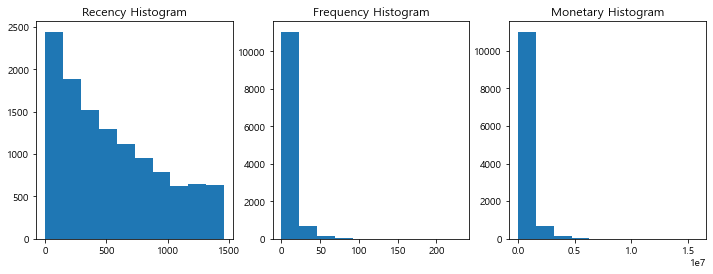

In [84]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(DF['recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(DF['frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(DF['monetary'])

- 히스토그램을 살펴보면, frequency와 monetary가 매우 skewed된 분포를 가지고 있음
- 군집화가 한쪽에 집중 될 가능성 多

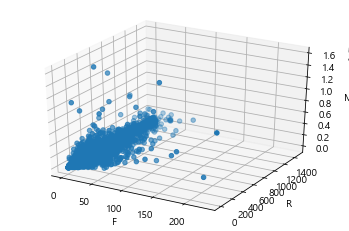

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = DF['frequency']
y = DF['recency']
z = DF['monetary']

ax.scatter(x, y, z, marker='o')

ax.set_xlabel('F')
ax.set_ylabel('R')
ax.set_zlabel('M')

plt.show()

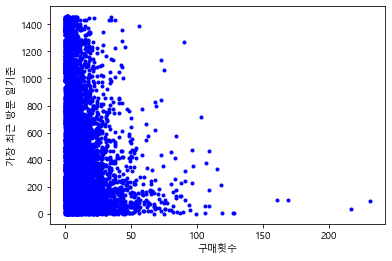

In [86]:
x = DF['frequency']
y = DF['recency']

plt.scatter(x, y, c='b', marker='.')

plt.xlabel('구매횟수')
plt.ylabel('가장 최근 방문 일기준')

plt.show()

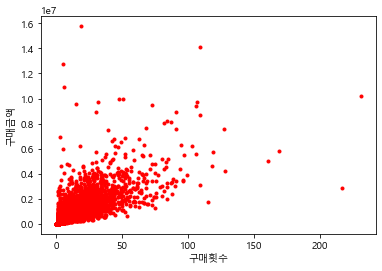

In [87]:
x = DF['frequency']
y = DF['monetary']

plt.scatter(x, y, c='r', marker='.')

plt.xlabel('구매횟수')
plt.ylabel('구매금액')

plt.show()

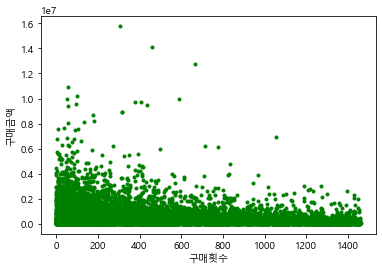

In [88]:
x = DF['recency']
y = DF['monetary']

plt.scatter(x, y, c='g', marker='.')

plt.xlabel('구매횟수')
plt.ylabel('구매금액')

plt.show()

### 라이브러리

In [89]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from datetime import datetime
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

**1. StandardScaler**
    각 특성의 평균을 0, 분산을 1로 스케일링합니다. 즉 데이터를 정규분포로 만듭니다. 하한값과 상한값이 존재하지 않을 수 있기에, 어떤 알고리즘에서는 문제가 있을 수 있습니다. 회귀보다 분류에 유용합니다.

**2. RobustScaler**
    각 특성들의 중앙값을 0, IQR(제3사분위수-제1사분위수,Q3-Q1)을 1로 스케일링합니다. StandardScaler와 비슷하지만, 이상치의 영향을 최소화합니다.

**3. MinMaxScaler(a,b)**
    각 특성의 하한값을 a, 상한값을 b로 스케일링합니다. a=0, b=1일 경우 Normalization으로 표기할 때도 있습니다. 분류보다 회귀에 유용합니다.

**4. MaxAbsScaler**
    각 특성을 절대값이 0과 1사이가 되도록 스케일링합니다. 즉, 모든 값은 -1과 1사이로 표현되며, 데이터가 양수일 경우 MinMaxScaler와 같습니다.

**5. Normalizer**
    앞의 4가지 스케일러는 각 특성(열)의 통계치를 이용하여 진행됩니다. 그러나 Normalizer의 경우 각 샘플(행)마다 적용되는 방식입니다. 이는 한 행의 모든 특성들 사이의 유클리드 거리(L2 norm)가 1이 되도록 스케일링합니다. 일반적인 데이터 전처리의 상황에서 사용되는 것이 아니라, 모델(특히나 딥러닝) 내 학습 벡터에 적용하며, 특히나 피쳐들이 다른 단위(키, 나이, 소득 등)라면 더더욱 사용하지 않습니다

In [90]:
DF.drop('최종방문일',axis=1,inplace=True)
scaler=MinMaxScaler()
ss=StandardScaler()
rs = RobustScaler()

clusterDF=scaler.fit_transform(DF)
clusterDF2=ss.fit_transform(DF)
clusterDF3 = rs.fit_transform(DF)

### MinMaxScaler

In [91]:
clusterDF

array([[0.004329  , 0.0017758 , 0.        ],
       [0.00865801, 0.00698906, 0.        ],
       [0.07792208, 0.10502616, 0.        ],
       ...,
       [0.004329  , 0.00342477, 0.99931507],
       [0.00865801, 0.00583479, 0.99931507],
       [0.004329  , 0.00583479, 1.        ]])

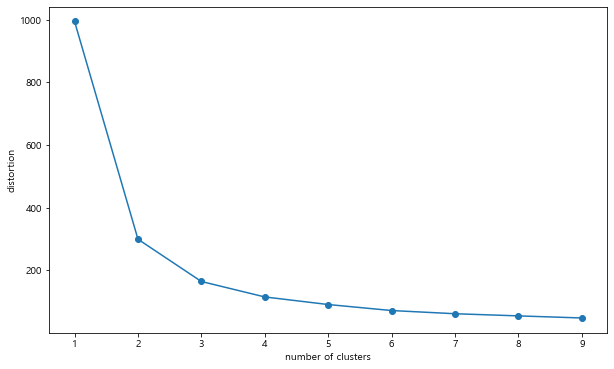

In [92]:
distortions=[]
for i in range(1,10):
    km=KMeans(n_clusters=i,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
    km.fit(clusterDF)
    # lnertia가 군집 내의 분산을 의미
    distortions.append(km.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),distortions,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('distortion')
plt.show()

### StandardScaler

In [93]:
clusterDF2

array([[-0.54228526, -0.58798549, -1.31487019],
       [-0.4574285 , -0.48926595, -1.31487019],
       [ 0.9002796 ,  1.36718987, -1.31487019],
       ...,
       [-0.54228526, -0.55676033,  2.26195856],
       [-0.4574285 , -0.51112356,  2.26195856],
       [-0.54228526, -0.51112356,  2.26441012]])

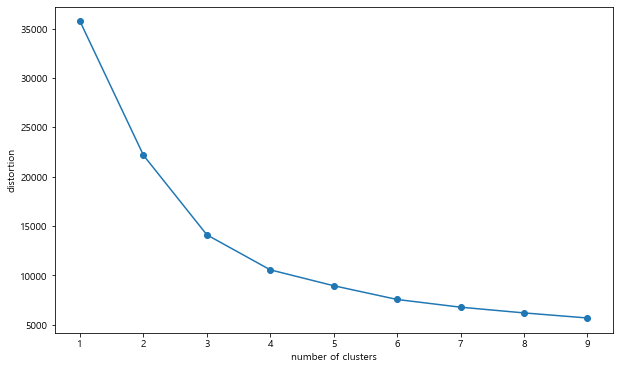

In [94]:
distortions=[]
for i in range(1,10):
    km=KMeans(n_clusters=i,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
    km.fit(clusterDF2)
    # lnertia가 군집 내의 분산을 의미
    distortions.append(km.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),distortions,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('distortion')
plt.show()

### RobustScaler

In [95]:
clusterDF3

array([[-0.25      , -0.38444714, -0.68843642],
       [-0.125     , -0.22464156, -0.68843642],
       [ 1.875     ,  2.78055893, -0.68843642],
       ...,
       [-0.25      , -0.33390036,  1.55359201],
       [-0.125     , -0.2600243 ,  1.55359201],
       [-0.25      , -0.2600243 ,  1.5551287 ]])

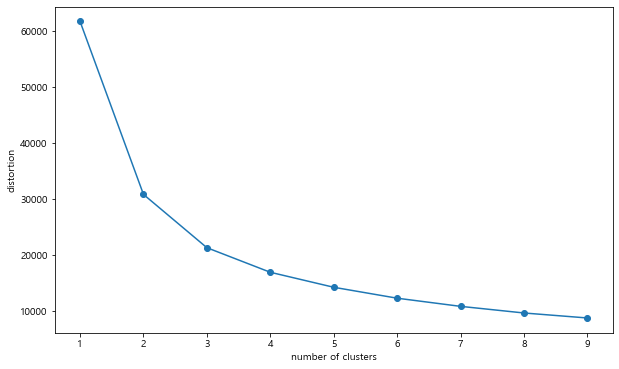

In [96]:
distortions=[]
for i in range(1,10):
    km=KMeans(n_clusters=i,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
    km.fit(clusterDF3)
    # lnertia가 군집 내의 분산을 의미
    distortions.append(km.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),distortions,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('distortion')
plt.show()

### K-means
1) MinMaxScaler

In [97]:
range_n_clusters=[2,3,4,5,6,7,8,9,10]

for n_clusters= 2 the average silhouette_score is: 0.5965998084675497
for n_clusters= 3 the average silhouette_score is: 0.5268120270556512
for n_clusters= 4 the average silhouette_score is: 0.48797426693531737
for n_clusters= 5 the average silhouette_score is: 0.4928505384581993
for n_clusters= 6 the average silhouette_score is: 0.4682751483208402
for n_clusters= 7 the average silhouette_score is: 0.43217591032879504
for n_clusters= 8 the average silhouette_score is: 0.4099460819216049
for n_clusters= 9 the average silhouette_score is: 0.41738131210949325
for n_clusters= 10 the average silhouette_score is: 0.40577876737956375


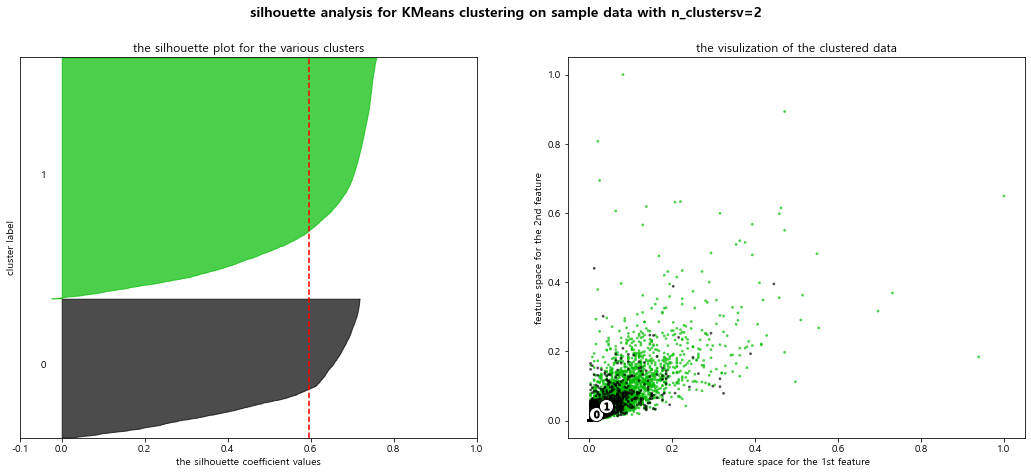

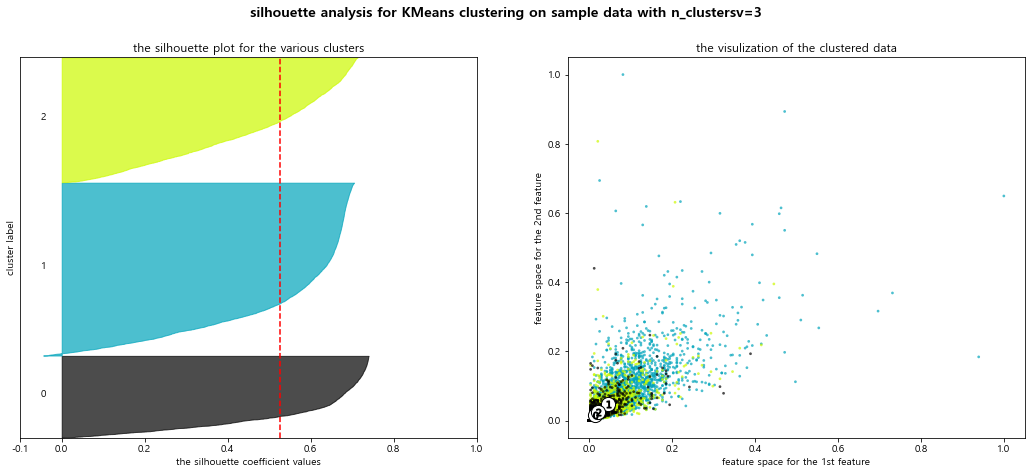

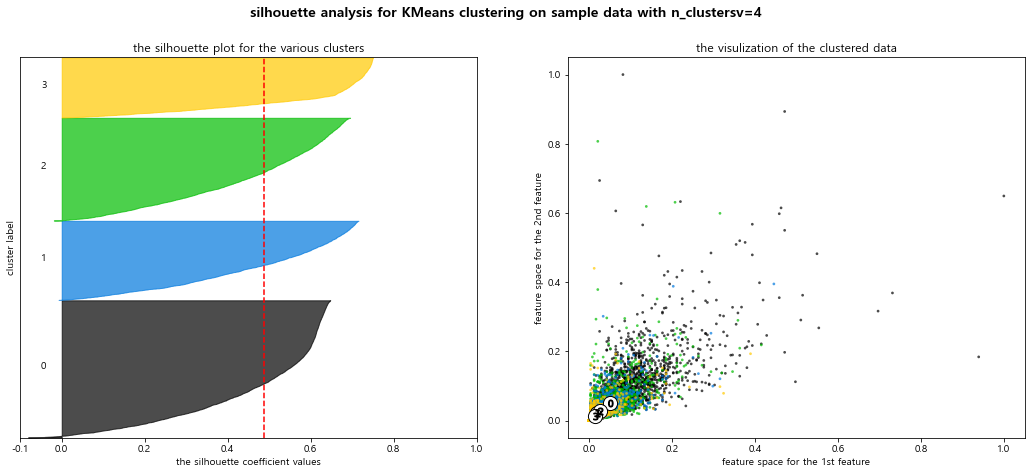

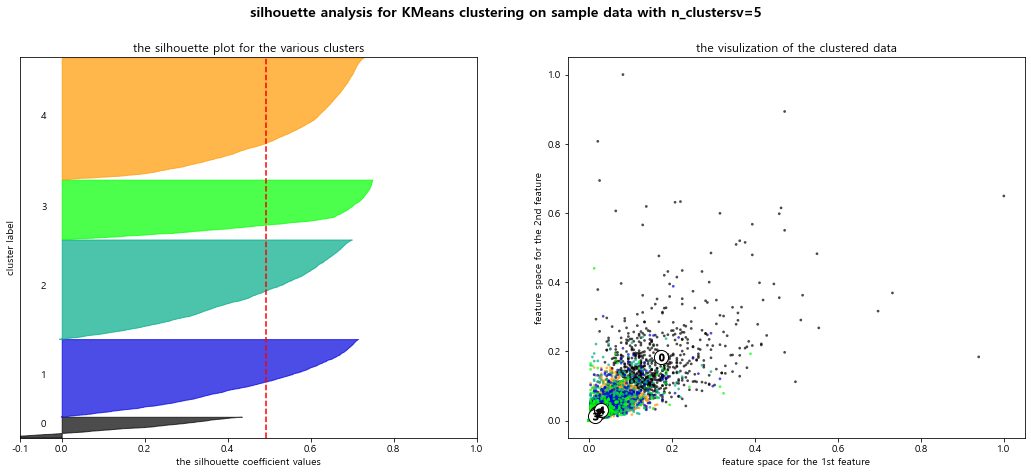

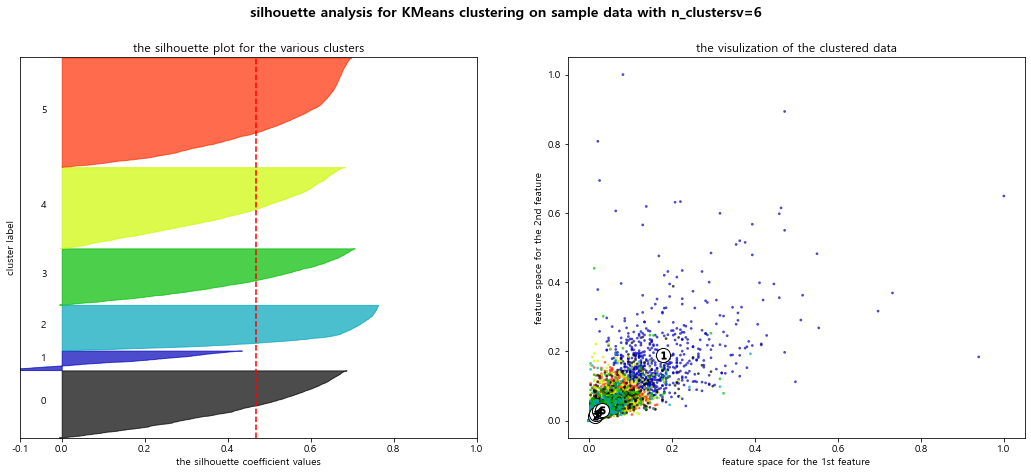

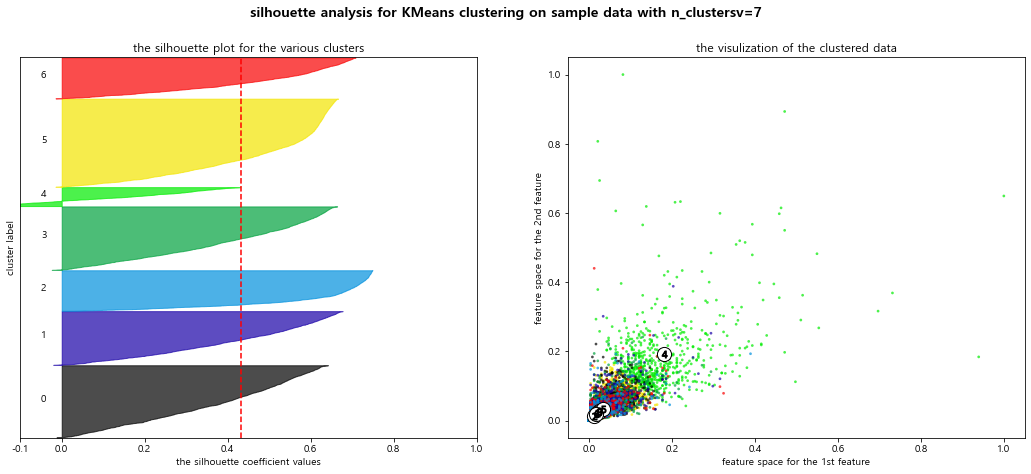

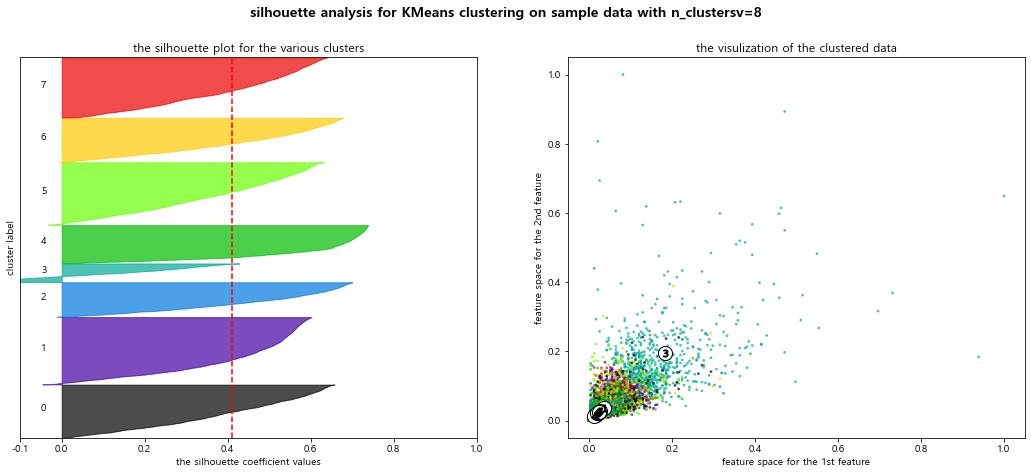

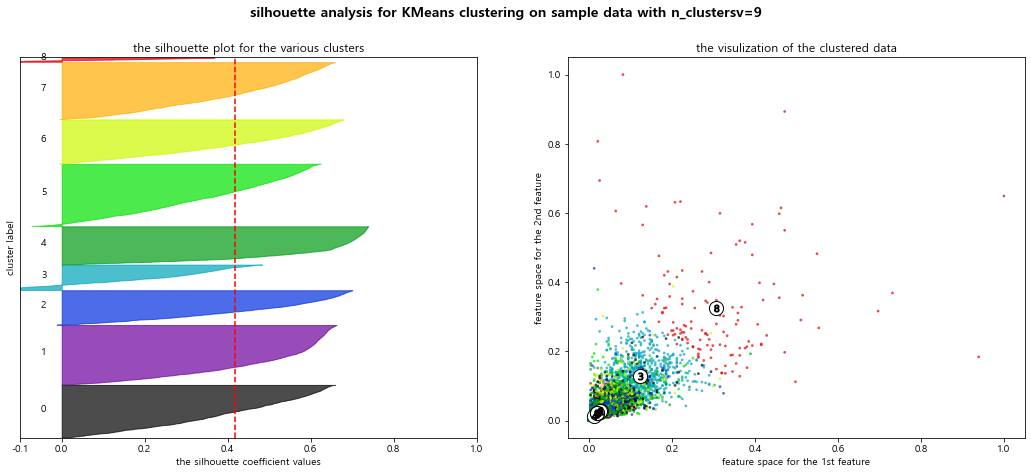

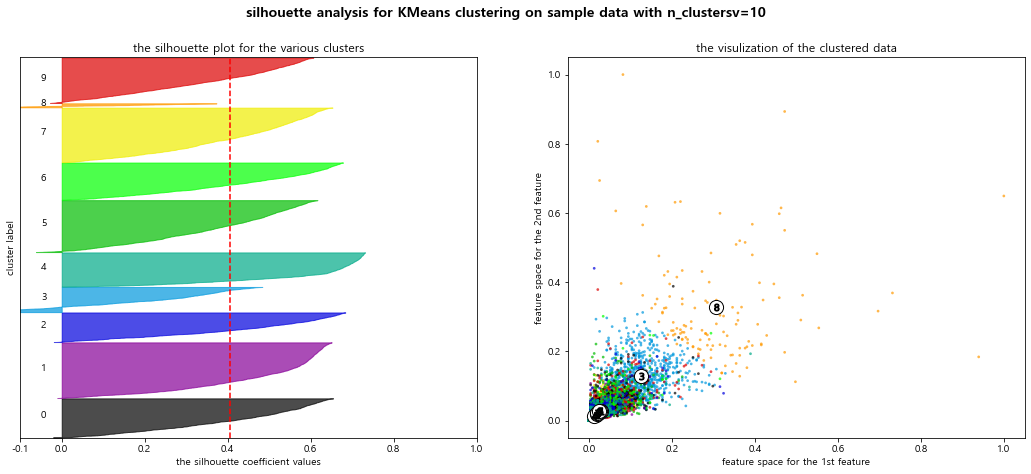

In [98]:
for n_clusters in range_n_clusters:
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2)=plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    ax1.set_xlim([-0.1,1]) # 실루엣 계수는 -1,1 사이에 값이지만 이 실습에선 -0.1,1까지만 본다
    ax1.set_ylim([0,len(clusterDF)+(n_clusters+1)*10])
    
    clusterer=KMeans(n_clusters=n_clusters,random_state=10) #kmeans
    cluster_labels=clusterer.fit_predict(clusterDF)
    
    silhouette_avg=silhouette_score(clusterDF,cluster_labels)
    print('for n_clusters=',n_clusters,
         'the average silhouette_score is:',silhouette_avg)
    
    sample_silhouette_values=silhouette_samples(clusterDF,cluster_labels)
    
    y_lower=10
    for i in range(n_clusters):
        # n_clusters=2,3,4,5,6
        # i 는 0-n_clusters 즉, 분류된 군집의 라벨
        ith_cluster_silhouette_values=\
            sample_silhouette_values[cluster_labels==i]
        
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        
        color=cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i)) # 군집 번호를 가운데 표시
        y_lower=y_upper+10 # 다음 그림의 시작점 = 지금 그림의 끝점 + 10
        
    ax1.set_title('the silhouette plot for the various clusters')
    ax1.set_xlabel('the silhouette coefficient values')
    ax1.set_ylabel('cluster label')
    
    ax1.axvline(x=silhouette_avg,color='red',linestyle='--') # 모든 개별 데이터의 실루엣값 평균 보조선
    
    ax1.set_yticks([]) # y출 눈금 지우기
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    
    # 2번째 그래프 ax2
    colors=cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
    ax2.scatter(clusterDF[:,0],clusterDF[:,1],marker='.',s=30,lw=0,alpha=0.7,c=colors,edgecolor='k') #라벨에 따라 다른 색으로 산점도
    
    #군집의 중심에 원그림
    centers=clusterer.cluster_centers_
    ax2.scatter(centers[:,0],centers[:,1],marker='o',c='white',alpha=1,s=200,edgecolor='k')
    
    #군집의 중심에 군집번호 표시
    for i, c in enumerate(centers):
        ax2.scatter(c[0],c[1],marker='$%d$' % i, alpha=1,s=50,edgecolor='k')
        
    ax2.set_title('the visulization of the clustered data')
    ax2.set_xlabel('feature space for the 1st feature')
    ax2.set_ylabel('feature space for the 2nd feature')
    plt.suptitle(("silhouette analysis for KMeans clustering on sample data " "with n_clustersv=%d" % n_clusters),fontsize=14,fontweight='bold')
plt.show()

In [99]:
kmeans=KMeans(n_clusters=3, init='k-means++',max_iter=200,random_state=0)
cluster_labels=kmeans.fit_predict(DF)
DF=pd.DataFrame(DF)
DF['label']=cluster_labels

In [100]:
DF.groupby(['label']).mean()

,frequency,monetary,recency
label,,,
0,3.956587,2.441591e+05,583.789686
1,21.765599,1.556418e+06,310.279933
2,49.359606,4.786475e+06,196.822660


**label=0**
R↑ F↓ M↓

**label=1**
R↓ F↓ M↑

**label=2**
R↓ F↑ M↑

In [101]:
DF['label'].value_counts()

0    9928
1    1779
2     203
Name: label, dtype: int64

2) StandardScaler

for n_clusters= 2 the average silhouette_score is: 0.5648581892446208
for n_clusters= 3 the average silhouette_score is: 0.45250899427943525
for n_clusters= 4 the average silhouette_score is: 0.4657265431389983
for n_clusters= 5 the average silhouette_score is: 0.4440729652203158
for n_clusters= 6 the average silhouette_score is: 0.3972299165158845
for n_clusters= 7 the average silhouette_score is: 0.39836315384079557
for n_clusters= 8 the average silhouette_score is: 0.4041967760746881
for n_clusters= 9 the average silhouette_score is: 0.40387608263474384
for n_clusters= 10 the average silhouette_score is: 0.3676143140897875


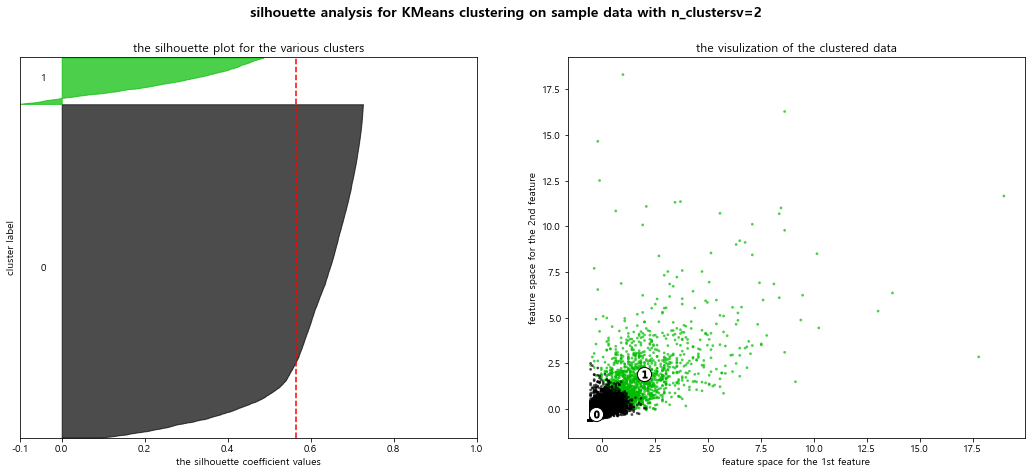

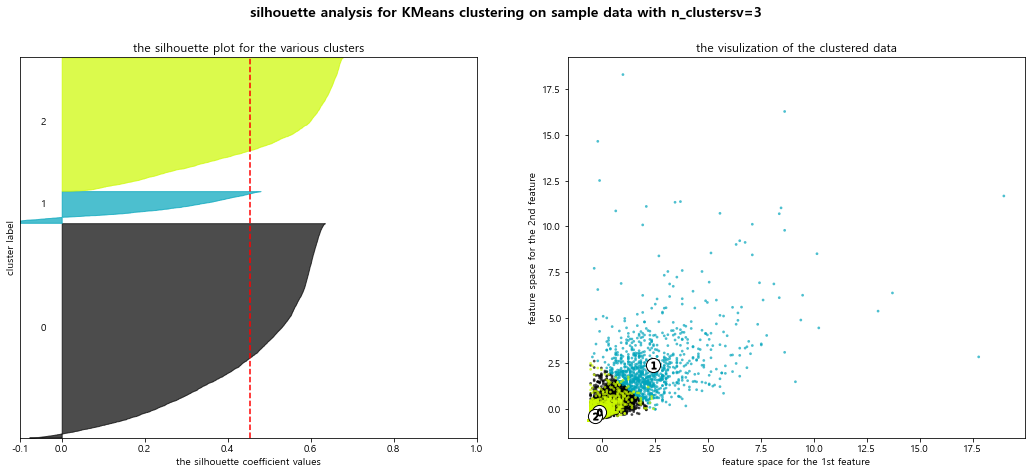

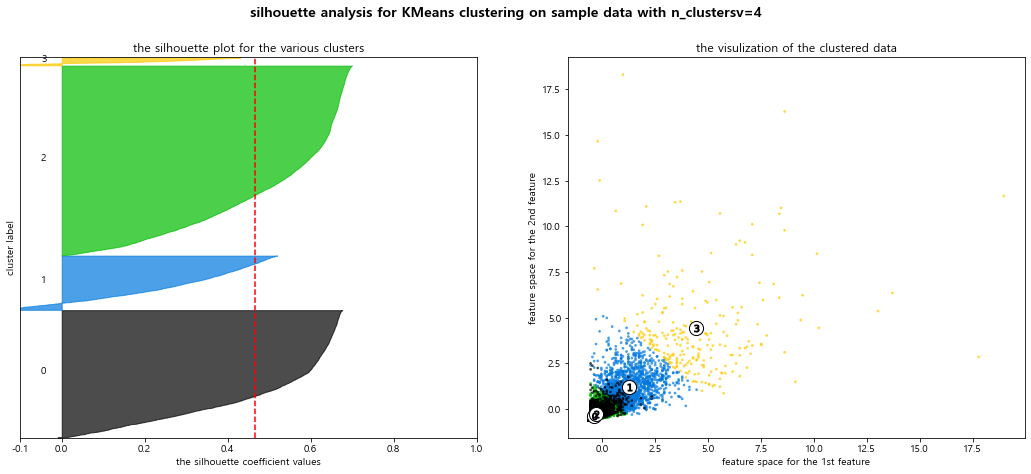

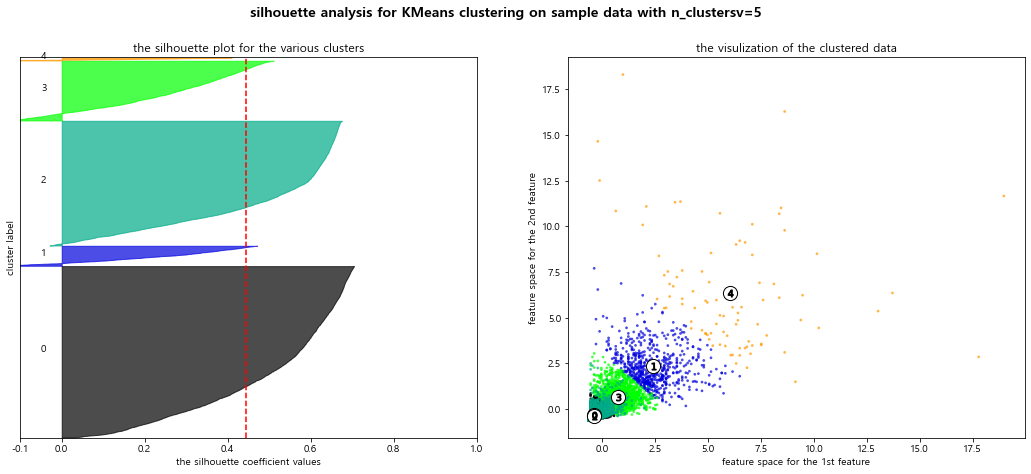

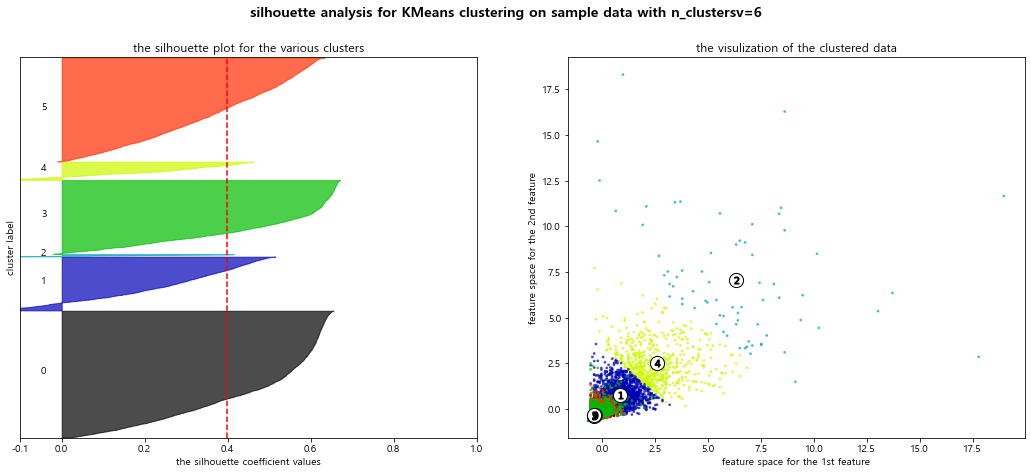

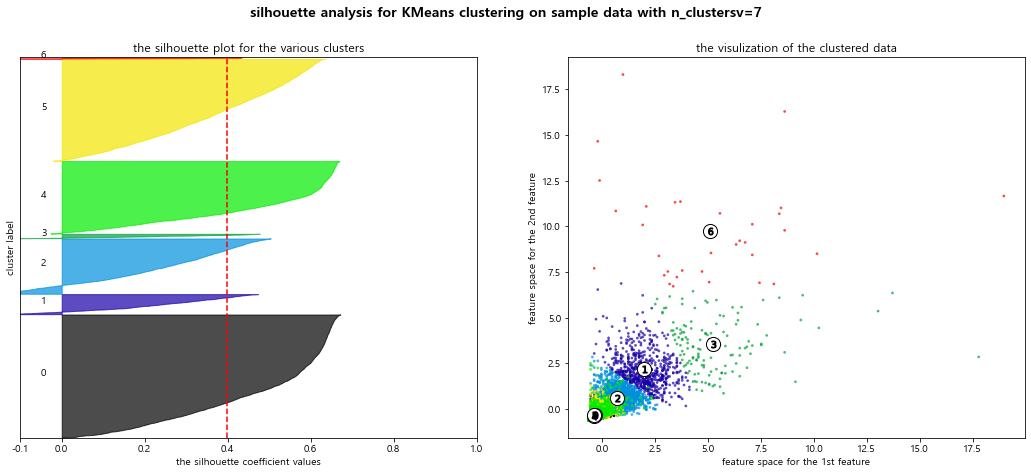

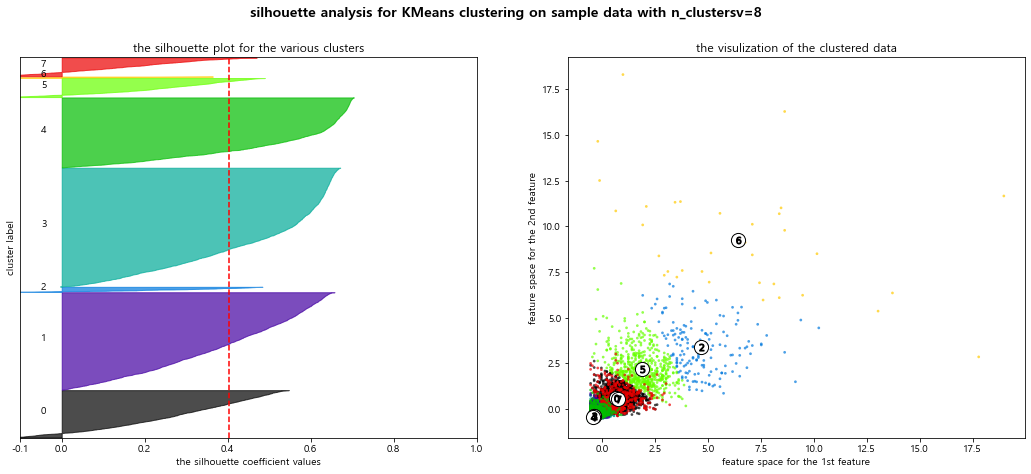

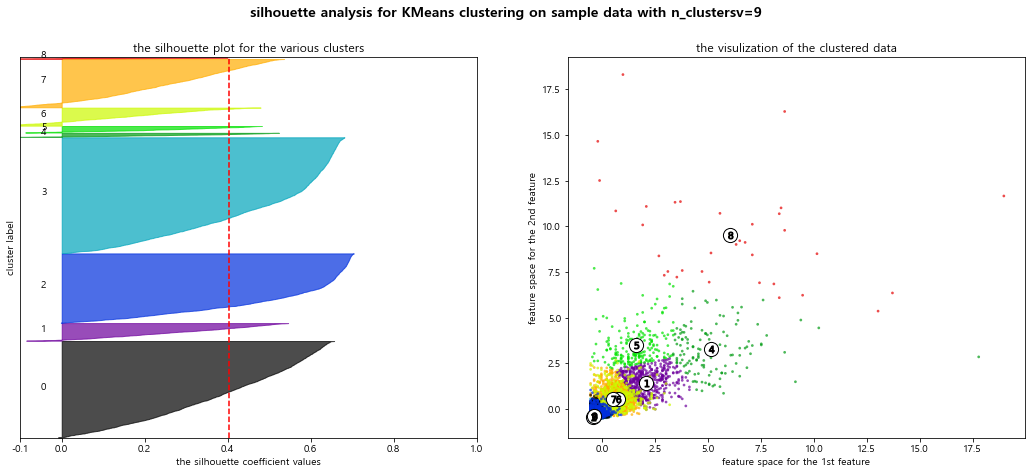

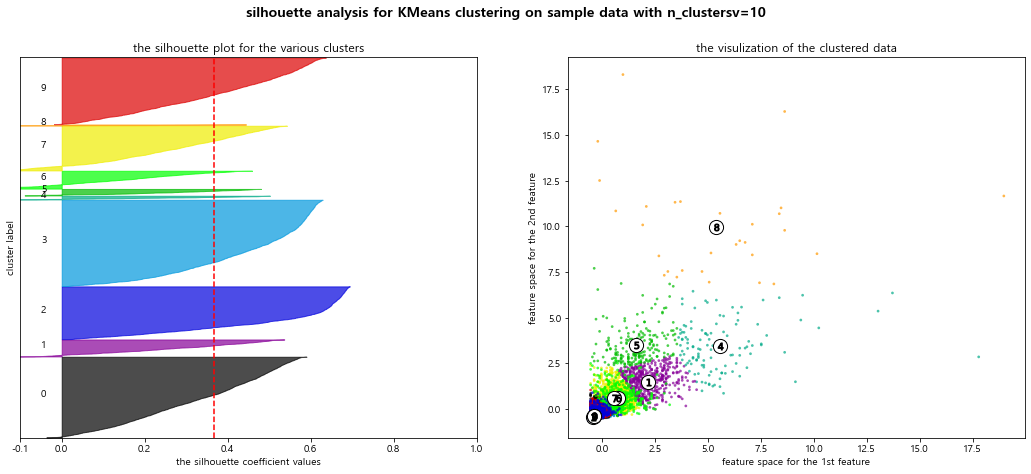

In [102]:
for n_clusters in range_n_clusters:
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2)=plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    ax1.set_xlim([-0.1,1]) # 실루엣 계수는 -1,1 사이에 값이지만 이 실습에선 -0.1,1까지만 본다
    ax1.set_ylim([0,len(clusterDF2)+(n_clusters+1)*10])
    
    clusterer=KMeans(n_clusters=n_clusters,random_state=10) #kmeans
    cluster_labels=clusterer.fit_predict(clusterDF2)
    
    silhouette_avg=silhouette_score(clusterDF2,cluster_labels)
    print('for n_clusters=',n_clusters,
         'the average silhouette_score is:',silhouette_avg)
    
    sample_silhouette_values=silhouette_samples(clusterDF2,cluster_labels)
    
    y_lower=10
    for i in range(n_clusters):
        # n_clusters=2,3,4,5,6
        # i 는 0-n_clusters 즉, 분류된 군집의 라벨
        ith_cluster_silhouette_values=\
            sample_silhouette_values[cluster_labels==i]
        
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        
        color=cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i)) # 군집 번호를 가운데 표시
        y_lower=y_upper+10 # 다음 그림의 시작점 = 지금 그림의 끝점 + 10
        
    ax1.set_title('the silhouette plot for the various clusters')
    ax1.set_xlabel('the silhouette coefficient values')
    ax1.set_ylabel('cluster label')
    
    ax1.axvline(x=silhouette_avg,color='red',linestyle='--') # 모든 개별 데이터의 실루엣값 평균 보조선
    
    ax1.set_yticks([]) # y출 눈금 지우기
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    
    # 2번째 그래프 ax2
    colors=cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
    ax2.scatter(clusterDF2[:,0],clusterDF2[:,1],marker='.',s=30,lw=0,alpha=0.7,c=colors,edgecolor='k') #라벨에 따라 다른 색으로 산점도
    
    #군집의 중심에 원그림
    centers=clusterer.cluster_centers_
    ax2.scatter(centers[:,0],centers[:,1],marker='o',c='white',alpha=1,s=200,edgecolor='k')
    
    #군집의 중심에 군집번호 표시
    for i, c in enumerate(centers):
        ax2.scatter(c[0],c[1],marker='$%d$' % i, alpha=1,s=50,edgecolor='k')
        
    ax2.set_title('the visulization of the clustered data')
    ax2.set_xlabel('feature space for the 1st feature')
    ax2.set_ylabel('feature space for the 2nd feature')
    plt.suptitle(("silhouette analysis for KMeans clustering on sample data " "with n_clustersv=%d" % n_clusters),fontsize=14,fontweight='bold')
plt.show()

In [103]:
kmeans=KMeans(n_clusters=4, init='k-means++',max_iter=200,random_state=0)
cluster_labels=kmeans.fit_predict(DF)
DF['label(ss)']=cluster_labels

In [104]:
DF.groupby(['label(ss)']).mean()

,frequency,monetary,recency,label
label(ss),,,,
0,3.349989,2.022613e+05,597.535955,0.00000
1,16.502849,1.122886e+06,350.732194,0.65717
2,66.285714,7.642367e+06,218.306122,2.00000
3,34.934426,2.847437e+06,250.550091,1.28051


**label(ss)=0**
R↑ F↓ M↓


**label(ss)=1**
R↓ F↓ M↑


**label(ss)=2**
R↓ F↑ M↑


**label(ss)=3**
R↓ F↓ M↑

In [105]:
DF['label(ss)'].value_counts()

0    9206
1    2106
3     549
2      49
Name: label(ss), dtype: int64

3) RobustScaler

for n_clusters= 2 the average silhouette_score is: 0.6939169921161182
for n_clusters= 3 the average silhouette_score is: 0.6003161228721741
for n_clusters= 4 the average silhouette_score is: 0.5117509570712839
for n_clusters= 5 the average silhouette_score is: 0.3863316265335073
for n_clusters= 6 the average silhouette_score is: 0.38820002983263785
for n_clusters= 7 the average silhouette_score is: 0.3898644194862195
for n_clusters= 8 the average silhouette_score is: 0.39059268818601145
for n_clusters= 9 the average silhouette_score is: 0.3932700565172606
for n_clusters= 10 the average silhouette_score is: 0.3931455334975091


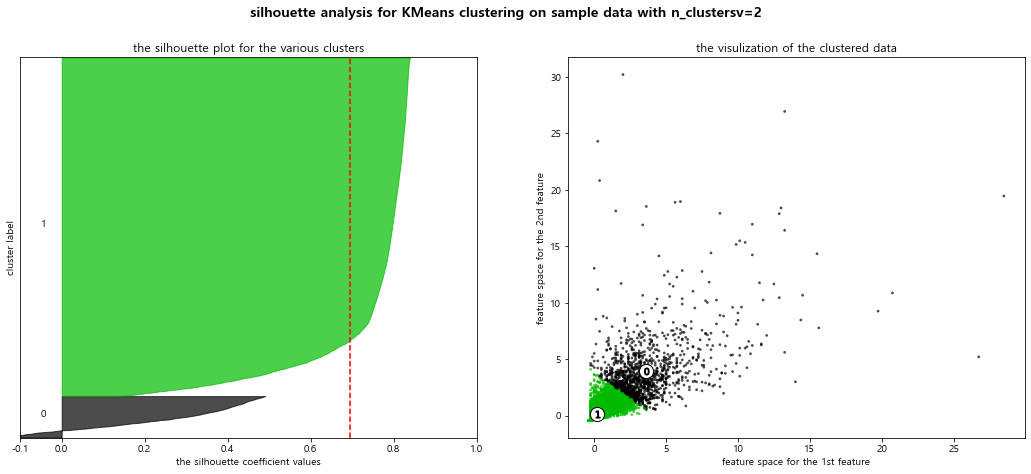

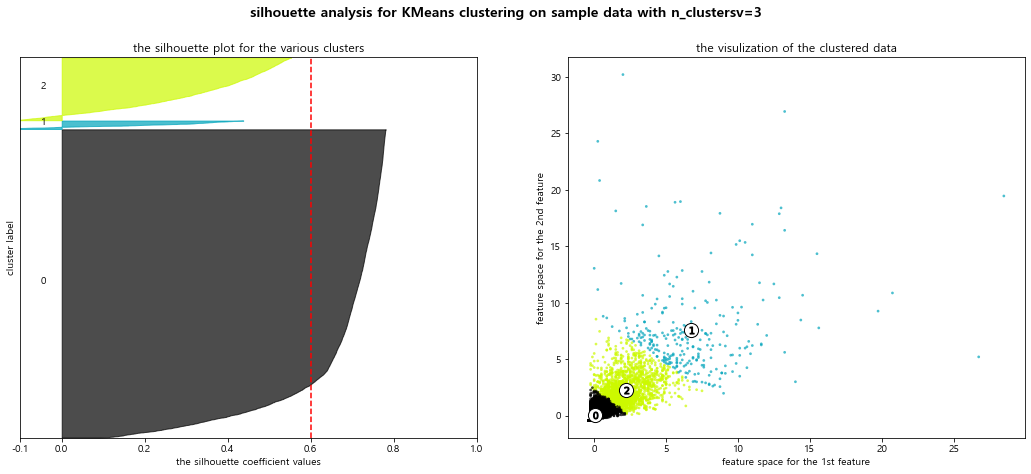

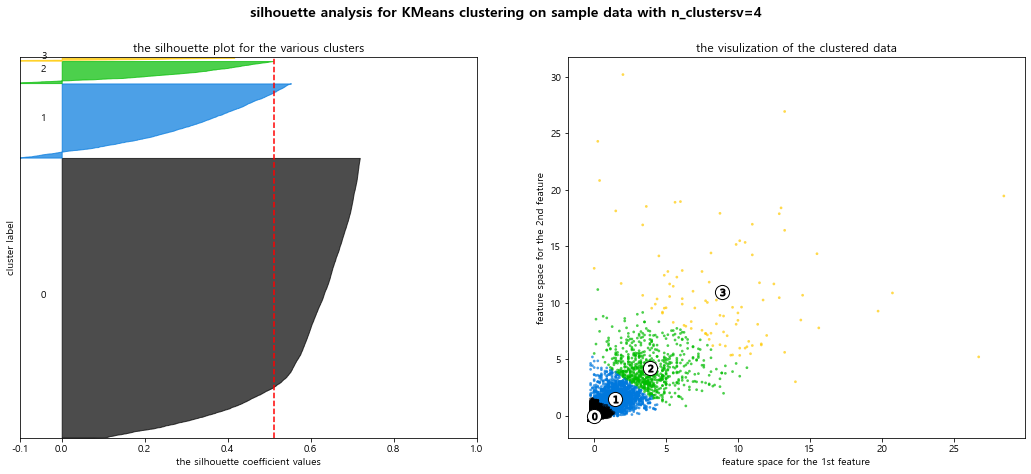

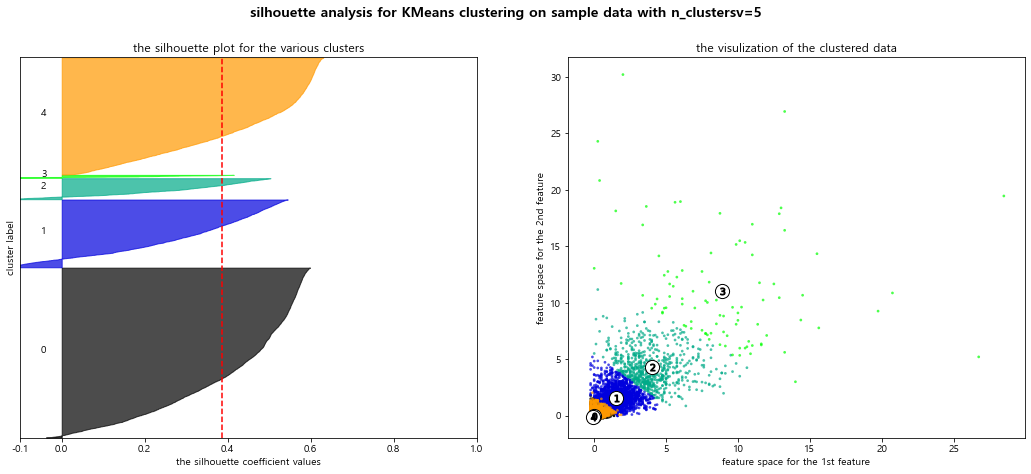

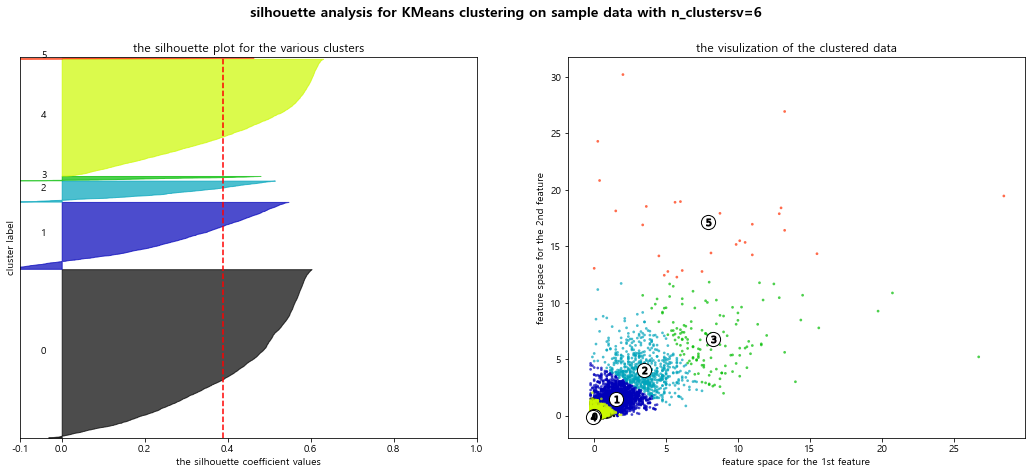

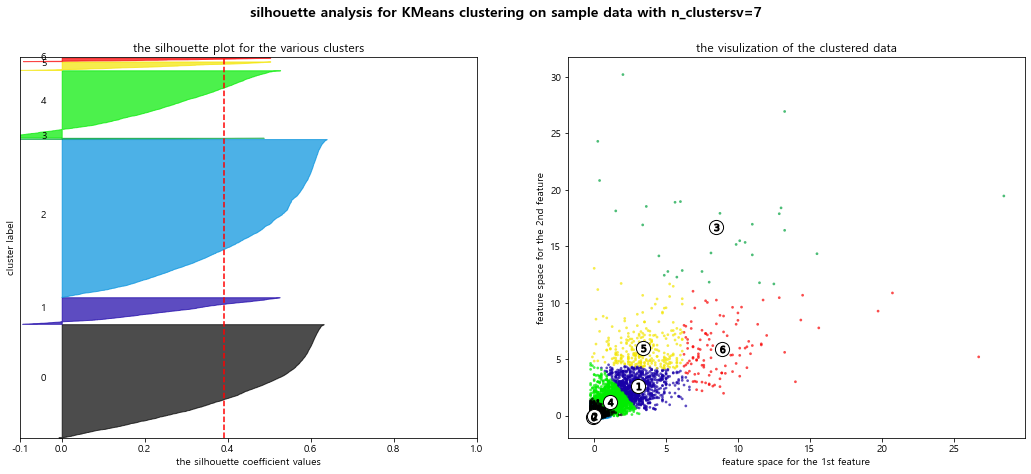

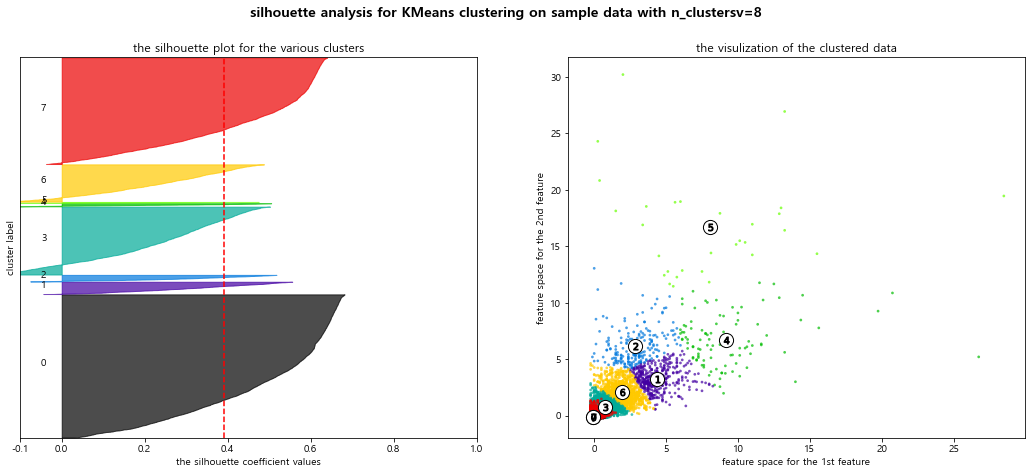

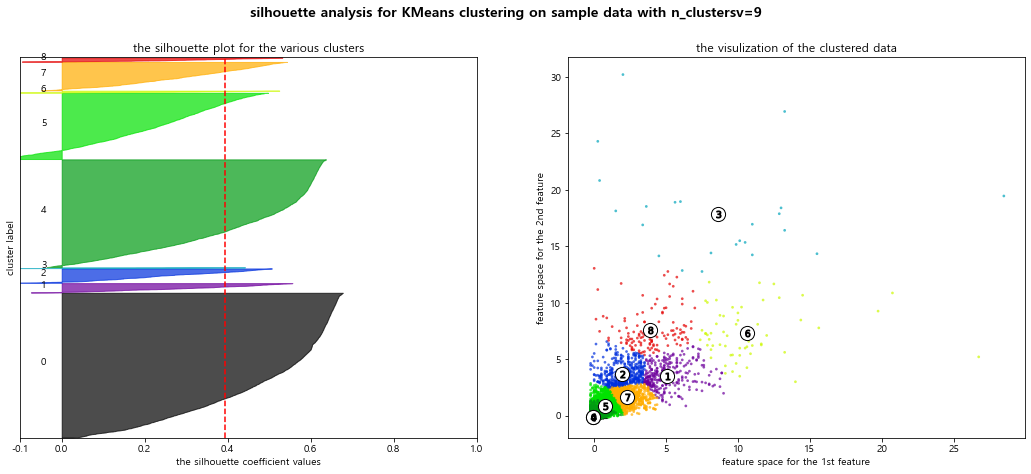

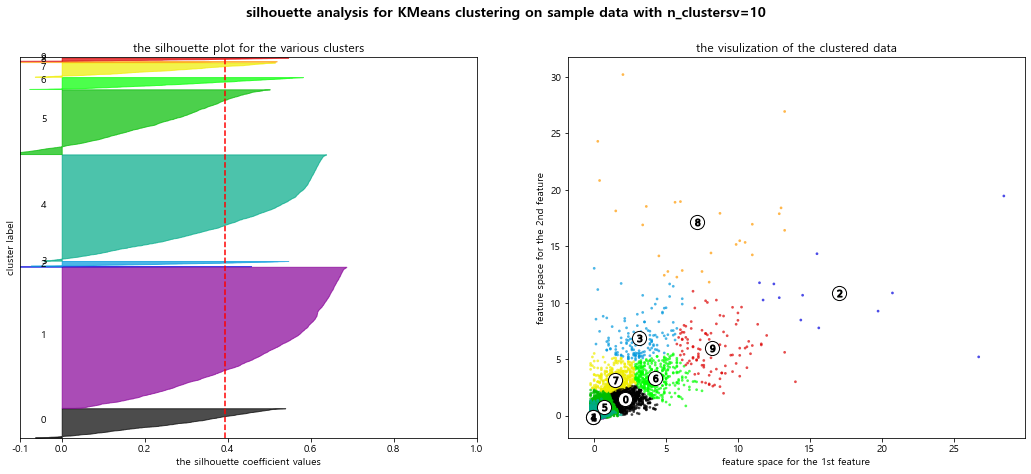

In [106]:
for n_clusters in range_n_clusters:
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2)=plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    ax1.set_xlim([-0.1,1]) # 실루엣 계수는 -1,1 사이에 값이지만 이 실습에선 -0.1,1까지만 본다
    ax1.set_ylim([0,len(clusterDF3)+(n_clusters+1)*10])
    
    clusterer=KMeans(n_clusters=n_clusters,random_state=10) #kmeans
    cluster_labels=clusterer.fit_predict(clusterDF3)
    
    silhouette_avg=silhouette_score(clusterDF3,cluster_labels)
    print('for n_clusters=',n_clusters,
         'the average silhouette_score is:',silhouette_avg)
    
    sample_silhouette_values=silhouette_samples(clusterDF3,cluster_labels)
    
    y_lower=10
    for i in range(n_clusters):
        # n_clusters=2,3,4,5,6
        # i 는 0-n_clusters 즉, 분류된 군집의 라벨
        ith_cluster_silhouette_values=\
            sample_silhouette_values[cluster_labels==i]
        
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        
        color=cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i)) # 군집 번호를 가운데 표시
        y_lower=y_upper+10 # 다음 그림의 시작점 = 지금 그림의 끝점 + 10
        
    ax1.set_title('the silhouette plot for the various clusters')
    ax1.set_xlabel('the silhouette coefficient values')
    ax1.set_ylabel('cluster label')
    
    ax1.axvline(x=silhouette_avg,color='red',linestyle='--') # 모든 개별 데이터의 실루엣값 평균 보조선
    
    ax1.set_yticks([]) # y출 눈금 지우기
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    
    # 2번째 그래프 ax2
    colors=cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
    ax2.scatter(clusterDF3[:,0],clusterDF3[:,1],marker='.',s=30,lw=0,alpha=0.7,c=colors,edgecolor='k') #라벨에 따라 다른 색으로 산점도
    
    #군집의 중심에 원그림
    centers=clusterer.cluster_centers_
    ax2.scatter(centers[:,0],centers[:,1],marker='o',c='white',alpha=1,s=200,edgecolor='k')
    
    #군집의 중심에 군집번호 표시
    for i, c in enumerate(centers):
        ax2.scatter(c[0],c[1],marker='$%d$' % i, alpha=1,s=50,edgecolor='k')
        
    ax2.set_title('the visulization of the clustered data')
    ax2.set_xlabel('feature space for the 1st feature')
    ax2.set_ylabel('feature space for the 2nd feature')
    plt.suptitle(("silhouette analysis for KMeans clustering on sample data " "with n_clustersv=%d" % n_clusters),fontsize=14,fontweight='bold')
plt.show()

In [107]:
kmeans=KMeans(n_clusters=3, init='k-means++',max_iter=200,random_state=0)
cluster_labels=kmeans.fit_predict(DF[['frequency', 'monetary', 'recency']])
DF['label(rs)']=cluster_labels

In [108]:
DF.groupby(['label(rs)']).mean()

,frequency,monetary,recency,label,label(ss)
label(rs),,,,,
0,3.956587,2.441591e+05,583.789686,0.0,0.072724
1,21.765599,1.556418e+06,310.279933,1.0,1.444070
2,49.359606,4.786475e+06,196.822660,2.0,2.758621


**label(rs)=0**
R↑ F↓ M↓


**label(rs)=1**
R↓ F↓ M↑


**label(rs)=2**
R↓ F↑ M↑


In [109]:
DF['label(rs)'].value_counts()

0    9928
1    1779
2     203
Name: label(rs), dtype: int64

In [110]:
pos.set_index('고객번호',inplace=True)

In [111]:
customer=pd.concat([pos,DF],axis=1)
customer.drop(['frequency','monetary','recency'],axis=1,inplace=True)
customer.reset_index(inplace=True)

In [ ]:
customer

In [141]:
customer.to_excel('./돈암점고객분류.xlsx', index=False, encoding='cp949')